### Data Conditioning
- Prepare distribution plots that show the mean and median for each feature.
- Discuss how we can assess skew from these plots.
- Standardize the data.
- Prepare distribution plots of the standardized data and discuss how the plots show the transformation that's been applied.
- Apply a log transformation to the original data, then standardize or standard scale it.
- Prepare distribution plots of the transformed data and discuss how the plots show the transformation that's been applied.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as st

from IPython.display import display
%matplotlib inline

In [2]:
housing_df = pd.read_csv('/home/jovyan/UCLA_CSX_450_2_2018_W/Project3_Housing/housing_data.csv',delim_whitespace=True, header=None)
housing_df.columns = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']
housing_df.drop(['MEDV'], axis=1, inplace=True)

In [3]:
housing_samp_df = housing_df.sample(5)

In [4]:
samp_stats = housing_samp_df.describe().T
samp_stats['skew'] = st.skew(housing_samp_df)
samp_stats['kurt'] = st.kurtosis(housing_samp_df)
samp_stats

,count,mean,std,min,25%,50%,75%,max,skew,kurt
CRIM,5.0,0.365604,0.390376,0.02498,0.09512,0.21161,0.52014,0.97617,0.790933,-0.861557
ZN,5.0,4.000000,8.944272,0.00000,0.00000,0.00000,0.00000,20.00000,1.500000,0.250000
INDUS,5.0,9.828000,7.959894,1.89000,3.97000,8.56000,12.83000,21.89000,0.597839,-0.944957
CHAS,5.0,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,-3.000000
NOX,5.0,0.549200,0.085987,0.43700,0.51800,0.52000,0.62400,0.64700,-0.050025,-1.382564
RM,5.0,6.623600,1.031653,5.75700,6.13700,6.28600,6.54000,8.39800,1.217214,-0.090570
AGE,5.0,76.400000,22.901201,45.00000,59.70000,87.40000,91.50000,98.40000,-0.469955,-1.465375
DIS,5.0,3.623740,1.732089,2.28850,2.34600,2.71470,4.50260,6.26690,0.749099,-1.058094
RAD,5.0,4.000000,1.732051,1.00000,4.00000,5.00000,5.00000,5.00000,-1.290994,-0.083333
TAX,5.0,381.000000,68.563839,264.00000,384.00000,398.00000,422.00000,437.00000,-1.172546,-0.169994


In [5]:
stats = housing_df.describe().T
stats['skew'] = st.skew(housing_df)
stats['kurt'] = st.kurtosis(housing_df)
stats

,count,mean,std,min,25%,50%,75%,max,skew,kurt
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677082,88.9762,5.207652,36.752786
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000,2.219063,3.979949
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400,0.294146,-1.233218
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000,3.395799,9.531453
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710,0.727144,-0.075864
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800,0.402415,1.861027
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000,-0.597186,-0.970014
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265,1.008779,0.471299
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000,1.001833,-0.870521
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000,0.667968,-1.142985


In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
scaler = StandardScaler()
housing_sc = scaler.fit_transform(housing_df)
housing_sc_df = pd.DataFrame(housing_sc, columns=housing_df.columns)

sc_stats = housing_sc_df.describe().T
sc_stats['skew'] = st.skew(housing_sc_df)
sc_stats['kurt'] = st.kurtosis(housing_sc_df)
display(stats)
display(sc_stats)

,count,mean,std,min,25%,50%,75%,max,skew,kurt
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677082,88.9762,5.207652,36.752786
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000,2.219063,3.979949
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400,0.294146,-1.233218
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000,3.395799,9.531453
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710,0.727144,-0.075864
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800,0.402415,1.861027
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000,-0.597186,-0.970014
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265,1.008779,0.471299
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000,1.001833,-0.870521
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000,0.667968,-1.142985


,count,mean,std,min,25%,50%,75%,max,skew,kurt
CRIM,506.0,-1.123388e-16,1.00099,-0.419782,-0.410970,-0.390667,0.007397,9.933931,5.207652,36.752786
ZN,506.0,7.898820e-17,1.00099,-0.487722,-0.487722,-0.487722,0.048772,3.804234,2.219063,3.979949
INDUS,506.0,2.106352e-16,1.00099,-1.557842,-0.867691,-0.211099,1.015999,2.422565,0.294146,-1.233218
CHAS,506.0,-3.510587e-17,1.00099,-0.272599,-0.272599,-0.272599,-0.272599,3.668398,3.395799,9.531453
NOX,506.0,-1.965929e-16,1.00099,-1.465882,-0.913029,-0.144217,0.598679,2.732346,0.727144,-0.075864
RM,506.0,-1.088282e-16,1.00099,-3.880249,-0.568630,-0.108466,0.482768,3.555044,0.402415,1.861027
AGE,506.0,-1.474446e-16,1.00099,-2.335437,-0.837448,0.317382,0.906798,1.117494,-0.597186,-0.970014
DIS,506.0,-8.425408e-17,1.00099,-1.267069,-0.805688,-0.279323,0.662371,3.960518,1.008779,0.471299
RAD,506.0,-1.123388e-16,1.00099,-0.982843,-0.637962,-0.523001,1.661245,1.661245,1.001833,-0.870521
TAX,506.0,0.000000e+00,1.00099,-1.313990,-0.767576,-0.464673,1.530926,1.798194,0.667968,-1.142985


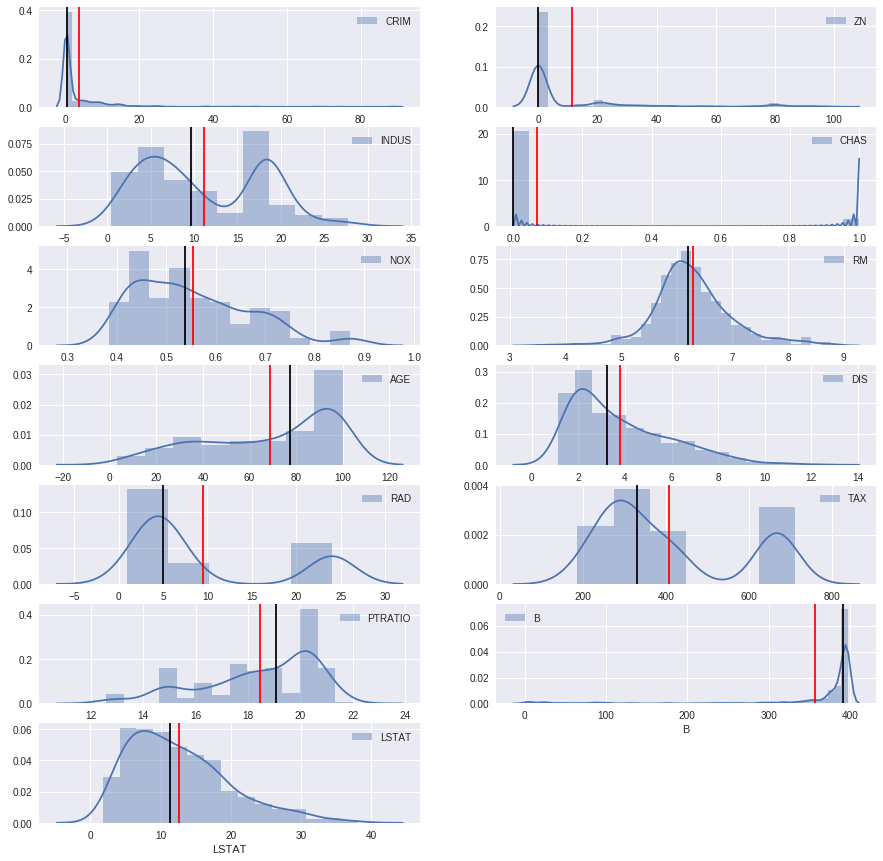

In [8]:
fig = plt.figure(figsize=(15,15))
for i, col in enumerate(housing_df.columns):
    fig.add_subplot(7,2,1+i)
    sns.distplot(housing_df[col], label=col)
    plt.axvline(housing_df[col].mean(), c='red')
    plt.axvline(housing_df[col].median(), c='black')
    plt.legend()

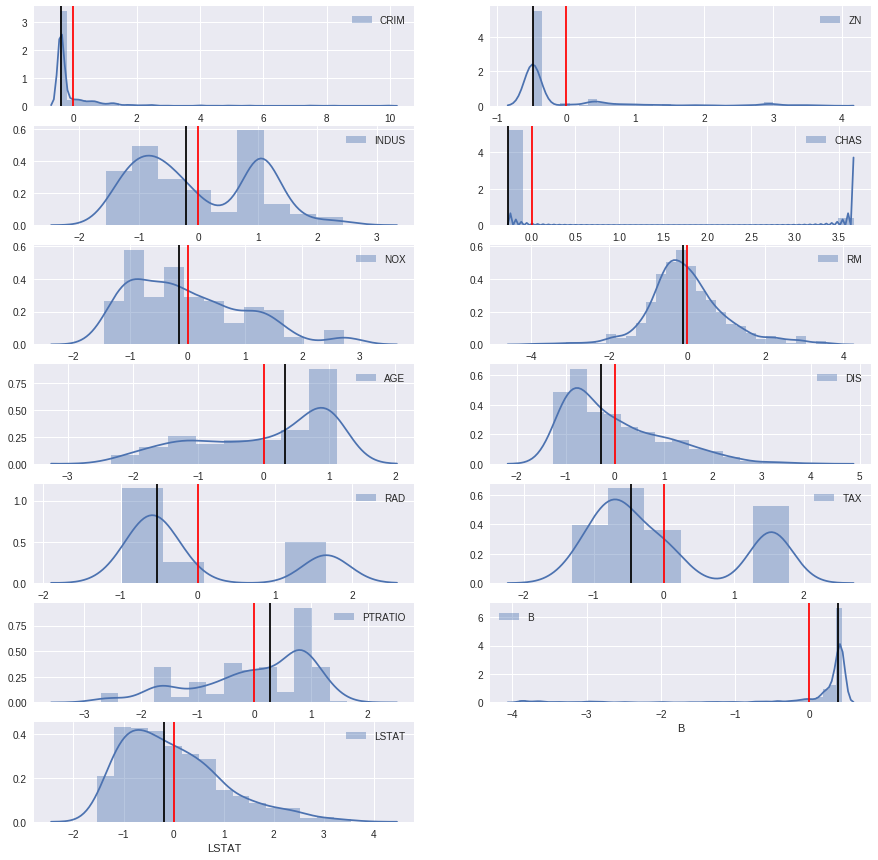

In [9]:
fig = plt.figure(figsize=(15,15))
for i, col in enumerate(housing_sc_df.columns):
    fig.add_subplot(7,2,1+i)
    sns.distplot(housing_sc_df[col], label=col)
    plt.axvline(housing_sc_df[col].mean(), c='red')
    plt.axvline(housing_sc_df[col].median(), c='black')
    plt.legend()

In [10]:
import scipy.stats as st

In [11]:
for col in housing_sc_df.columns:
    original_col_skewtest = st.skewtest(housing_df[col])
    scaled_col_skewtest = st.skewtest(housing_sc_df[col])
    print("{}\norig skew test: {} \nscaled skew test: {}\n\n".format(col, 
                                                                     original_col_skewtest,
                                                                     scaled_col_skewtest))

CRIM
orig skew test: SkewtestResult(statistic=19.671549705124381, pvalue=3.7804824553883424e-86) 
scaled skew test: SkewtestResult(statistic=19.671549705124377, pvalue=3.780482455388666e-86)


ZN
orig skew test: SkewtestResult(statistic=13.25203813676775, pvalue=4.3911373104936814e-40) 
scaled skew test: SkewtestResult(statistic=13.25203813676775, pvalue=4.3911373104936814e-40)


INDUS
orig skew test: SkewtestResult(statistic=2.686151035239257, pvalue=0.0072280407415186978) 
scaled skew test: SkewtestResult(statistic=2.686151035239253, pvalue=0.007228040741518782)


CHAS
orig skew test: SkewtestResult(statistic=16.412905603935535, pvalue=1.5462501603998191e-60) 
scaled skew test: SkewtestResult(statistic=16.412905603935535, pvalue=1.5462501603998191e-60)


NOX
orig skew test: SkewtestResult(statistic=6.1208887559346934, pvalue=9.30548555733988e-10) 
scaled skew test: SkewtestResult(statistic=6.1208887559346969, pvalue=9.3054855573396783e-10)


RM
orig skew test: SkewtestResult(statisti

In [12]:
# Removing NA & zero
housing_na_df = housing_df.copy()
housing_na_df= housing_na_df.dropna(axis=0, how='any')

housing_na_df = housing_df.copy().drop(['CHAS', 'ZN'], axis=1)
housing_na_df

,CRIM,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,2.31,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,7.07,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,7.07,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,2.18,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,2.18,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33
5,0.02985,2.18,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21
6,0.08829,7.87,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43
7,0.14455,7.87,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15
8,0.21124,7.87,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93
9,0.17004,7.87,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10


In [13]:
housing_log_df = np.log(housing_na_df)

scaler.fit(housing_log_df)
housing_log_sc = scaler.transform(housing_log_df)
housing_log_sc_df = pd.DataFrame(housing_log_sc, columns=housing_na_df.columns)

In [14]:
for col in housing_log_df.columns:
    original_col_skewtest = st.skewtest(housing_df[col])
    scaled_col_skewtest = st.skewtest(housing_sc_df[col])
    original_log_col_skewtest = st.skewtest(housing_log_df[col])
    scaled_log_col_skewtest = st.skewtest(housing_log_sc_df[col])
    print("""{}
    orig:       {} 
    scaled:     {}
    orig log:   {}
    scaled log: {}
    
    """.format(col, 
               original_col_skewtest,
               scaled_col_skewtest, 
               original_log_col_skewtest,
               scaled_log_col_skewtest))

CRIM
    orig:       SkewtestResult(statistic=19.671549705124381, pvalue=3.7804824553883424e-86) 
    scaled:     SkewtestResult(statistic=19.671549705124377, pvalue=3.780482455388666e-86)
    orig log:   SkewtestResult(statistic=3.6359686390123871, pvalue=0.00027693802484036014)
    scaled log: SkewtestResult(statistic=3.6359686390123871, pvalue=0.00027693802484036014)
    
    
INDUS
    orig:       SkewtestResult(statistic=2.686151035239257, pvalue=0.0072280407415186978) 
    scaled:     SkewtestResult(statistic=2.686151035239253, pvalue=0.007228040741518782)
    orig log:   SkewtestResult(statistic=-5.5018791071469169, pvalue=3.7576458886988959e-08)
    scaled log: SkewtestResult(statistic=-5.5018791071469257, pvalue=3.7576458886986954e-08)
    
    
NOX
    orig:       SkewtestResult(statistic=6.1208887559346934, pvalue=9.30548555733988e-10) 
    scaled:     SkewtestResult(statistic=6.1208887559346969, pvalue=9.3054855573396783e-10)
    orig log:   SkewtestResult(statistic=3.22910

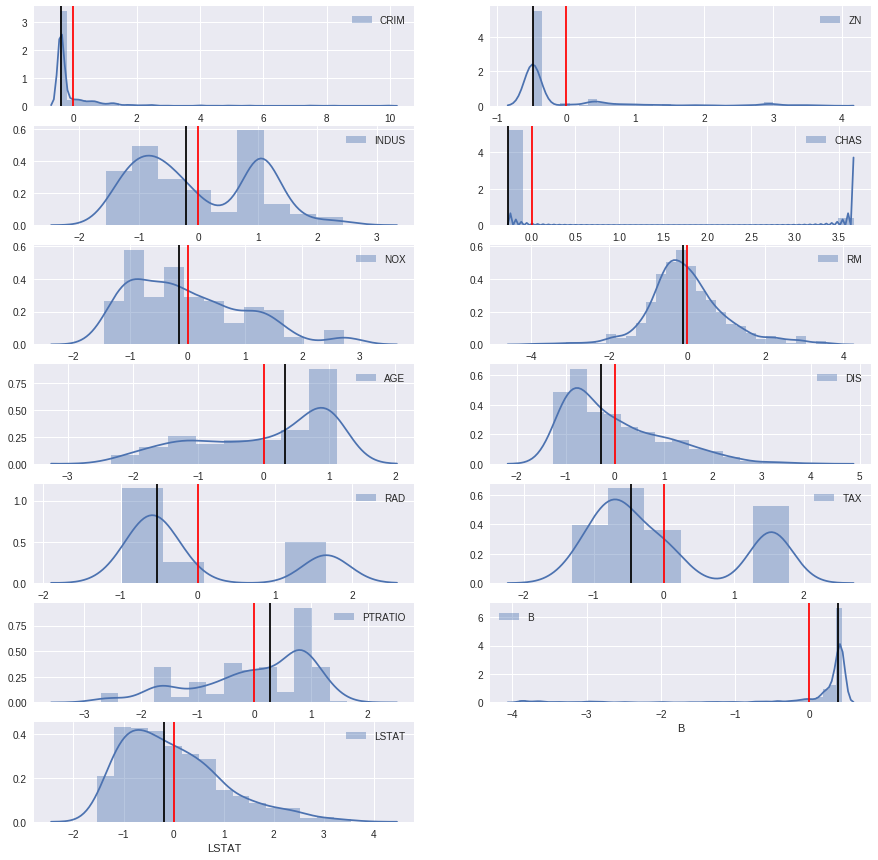

In [15]:
fig = plt.figure(figsize=(15,15))
for i, col in enumerate(housing_sc_df.columns):
    fig.add_subplot(7,2,1+i)
    sns.distplot(housing_sc_df[col], label=col)
    plt.axvline(housing_sc_df[col].mean(), c='red')
    plt.axvline(housing_sc_df[col].median(), c='black')
    plt.legend()

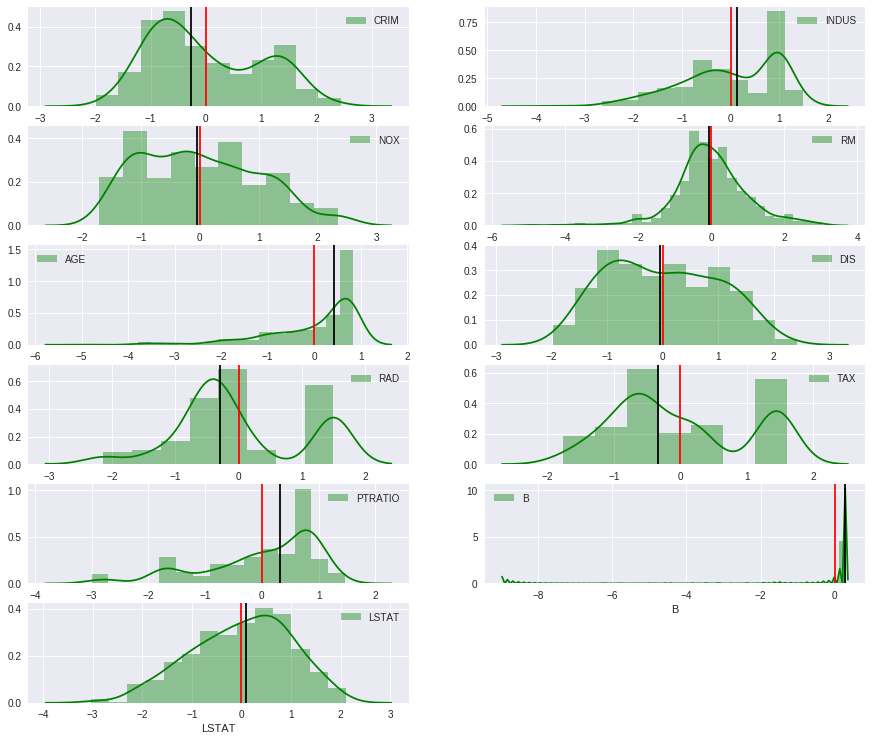

In [18]:
fig = plt.figure(figsize=(15,15))
for i, col in enumerate(housing_log_sc_df.columns):
    fig.add_subplot(7,2,1+i)
    sns.distplot(housing_log_sc_df[col], label=col,color='g')
    plt.axvline(housing_log_sc_df[col].mean(), c='red')
    plt.axvline(housing_log_sc_df[col].median(), c='black')
    plt.legend()

In [17]:
housing_log_sc_df.to_pickle('final_log_sc.p')

INDUS, AGE, PTRATIO, B, LSAT are negatively skewed (mean is less than median) others are positeve scewed with RM & KNOX (median is alsmost same as mean)
Aslo scaling pulls the mean to zero